In [2]:
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math, sys

%matplotlib inline

plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.labelweight'] = 'regular'
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

plt.rcParams['font.family'] = [u'serif']
plt.rcParams['font.size'] = 20

# #want the reward for each episode to be as calculated with PID eq
# ## Using DataAnalysis notbook

# ## this all needs to be changed now that we aren't just looking at one episode
# step100_mean = -17.65001875
# step100_std  = 1.553729686751266
# ##
# step100_mean = 39.24#
# step100_mean = -6.46#12.17
# step100_std =  6.60839952001191

2.1.0


In [ ]:
#need to add the data reward from each episode and the PID eq reward from each episode

In [68]:
## READ data 

#### Good below ###
#dir_name = '../drivers/results_dqn128_with500warmup_surrogate1_in5_out3_D10122020-T222150_v1/'
# dir_name = '../drivers/results_dqn128_gamma85_250warmup_train5_surrogate1_in5_out3_D10132020-T214923_v1/'
# # Best MLP (>500)
# dir_name = '../drivers/results_dqn_MLP128_gamma85_250warmup_train5_surrogate1_reward1_in5_out3_D10142020-T151949_v1/'
# ## Best MLP (>1750)
# dir_name = '../drivers/results_dqn_MLP128_gamma85_250warmup_train5_surrogate1_reward1_in5_out3_D10142020-T200346_v1/'
# ## Now LSTM (power bumped killed it)
# dir_name = '../drivers/results_dqn_LSTM128_gamma85_250warmup_train5_surrogate1_reward1_in5_out3_D10152020-T110300_v1/'
# ## Now
# dir_name = '../drivers/results_dqn_LSTM128_gamma85_250warmup_train5_surrogate1_reward1_in5_out3_D10152020-T163022_v1/'

#Input the directory where your training/test results are saved
dir_name = '../test/UQ_play_results_dqn_surrogate1_D06012021-T134031_v1/'

#noUQ: '../results/sansUQ_results_dqn_MLP_1_n128_gamma85_250warmup_train5_surrogate1_in6_out2_D05282021-T113137_v1/'

#'../results/results_dqn_MLP_1_n128_gamma85_250warmup_train5_surrogate1_in5_out3_D04142021-T114217_v1/'
#
#'../test/UQ_play_results_dqn_surrogate1_D05272021-T102210_v1/'
#'../results/results_dqn_MLP_1_n128_gamma85_250warmup_train5_surrogate1_in6_out2_UQ_D05262021-T104923_v1/'

#IPAC: '../test/UQ_play_results_dqn_surrogate1_D05172021-T142933_v1/'
#IPAC: '../results/results_dqn_MLP_1_n128_gamma85_250warmup_train5_surrogate1_in6_out2_UQ_D05132021-T201402_v1/'

#'../results/results_dqn_MLP_1_n128_gamma85_250warmup_train5_surrogate1_in5_out3_D05032021-T104834_v1/'
#'../test/play_results_dqn_surrogate1_D04152021-T165301_v1/'

#with 15 actions: '../results/results_dqn_MLP_1_n128_gamma85_250warmup_train5_surrogate1_in5_out3_D04222021-T141148_v1/'

#'../test/play_results_dqn_surrogate1_D04152021-T165301_v1/'
#FINAL TEST FOR PAPER: '../test/play_results_dqn_surrogate1_D04152021-T165301_v1/'
#FINAL TRAIN FOR PAPER: '../results/results_dqn_MLP_1_n128_gamma85_250warmup_train5_surrogate1_in5_out3_D04142021-T114217_v1/'
#'../test/play_results_dqn_surrogate1_D04142021-T101914_v1/'
#'../results/results_dqn_MLP_1_n128_gamma85_250warmup_train5_surrogate1_in5_out3_D04142021-T114217_v1/'

#evaluating 5 to 2 test: '../test/play_results_dqn_surrogate1_D03302021-T120645_v1/'
#evaluating 5 to 2 train: '../results/results_dqn_MLP_1_n128_gamma85_250warmup_train5_surrogate1_in5_out3_D03282021-T111709_v1/'
#UQ_results_dqn_MLP_Ensemble_5_n128_gamma85_250warmup_train5_surrogate1_in6_out2_D03032021-T111344_v1/'
#evaluating 5 to 2 ensemble test: '../test/play_results_dqn_surrogate1_D03312021-T101904_v1/'
#evaluating 5 to 2 ensemble train: results/results_dqn_MLP_Ensemble_5_n128_gamma85_250warmup_train5_surrogate1_in5_out3_D03252021-T153257_v1/

#6t02 test: '../test/UQ_play_results_dqn_surrogate1_D03092021-T170333_v1/'
#6to2 on 500 to 1100 slice: '../results/UQ_results_dqn_MLP_Ensemble_5_n128_gamma85_250warmup_train5_surrogate1_in6_out2_D03052021-T172957_v1/'

#### Good below ###
#filename1 = dir_name+'fnal_surrogate_dqn_mlp_episodes2500_steps50_D10122020-T222150_batched_memories.log'
# filename1 = dir_name+'fnal_surrogate_dqn_mlp_episodes1000_steps50_D10132020-T214923_batched_memories.log'
# # Best MLP (>500)
# filename1 = dir_name+'fnal_surrogate_dqn_mlp_episodes1000_steps50_D10142020-T151949_batched_memories.log'
# ## Best MLP (>1750)
# filename1 = dir_name+'fnal_surrogate_dqn_mlp_episodes5000_steps50_D10142020-T200346_batched_memories.log'
# ## Now LSTM (power bumped killed it)
# filename1 = dir_name+'fnal_surrogate_dqn_mlp_episodes2000_steps50_D10152020-T110300_batched_memories.log'


#Diana is changing now
filename1 = dir_name+'batched_memories.log'

## Now
#results_dqn_LSTM128_gamma85_250warmup_train5_surrogate1_reward1_in5_out3_D10152020-T163022_v1
frame = pd.read_csv(filename1, sep=' ',
                 header=None,names=['current_state', 'action', 'reward', 'PID_reward', 'data_reward', 'next_state', 'total_reward','done','policy_type','episode'])

                    
                #names = ['current_state', 'action', 'reward', 'next_state', 'total_reward', 'done', 'policy_type', 'episode'])
                #
frame

,current_state,action,reward,PID_reward,data_reward,next_state,total_reward,done,policy_type,episode
0,[-0.17213808 0.12567613 -0.70582956 0.161322...,6,-0.130391,-0.050985,-0.014687,[-0.17213808 0.12567613 -0.70582956 0.161322...,-0.130391,False,1,0
1,[ 0.08262368 -0.07388389 -0.70582956 0.161057...,9,-0.077152,-0.122833,-0.115313,[ 0.08262368 -0.07388389 -0.70582956 0.161057...,-0.207542,False,1,0
2,[-0.03867906 -0.05439883 -0.70582956 0.160793...,6,-0.056887,-0.012672,-0.055312,[-0.03867906 -0.05439883 -0.70582956 0.160793...,-0.264430,False,1,0
3,[-0.1599818 0.0763883 -0.70582956 0.161785...,6,-0.079131,-0.092153,-0.090313,[-0.1599818 0.0763883 -0.70582956 0.161785...,-0.343561,False,1,0
4,[-0.03757394 0.00577661 -0.70582956 0.161388...,8,-0.005695,-0.071043,-0.034688,[-0.03757394 0.00577661 -0.70582956 0.161388...,-0.349256,False,1,0
...,...,...,...,...,...,...,...,...,...,...
49995,[ 0.05103036 -0.01694146 -0.70582956 -0.118082...,6,-0.017932,-0.052675,-0.139687,[ 0.05103036 -0.01694146 -0.70582956 -0.118082...,-2.259517,False,1,999
49996,[ 5.1030356e-02 -2.5530338e-02 -7.0582956e-01 ...,7,-0.026864,-0.001958,-0.169687,[ 5.1030356e-02 -2.5530338e-02 -7.0582956e-01 ...,-2.286381,False,1,999
49997,[-7.0272379e-02 3.8362533e-02 -7.0582956e-01 ...,6,-0.039585,-0.033757,-0.079687,[-7.0272379e-02 3.8362533e-02 -7.0582956e-01 ...,-2.325966,False,1,999
49998,[-0.07027238 0.04513109 -0.70582956 -0.117355...,7,-0.046624,-0.010063,-0.035312,[-0.07027238 0.04513109 -0.70582956 -0.117355...,-2.372589,False,1,999


In [22]:
#in case you need to explore anything
frame = frame[frame.index < 90000]
frame = frame[(frame.episode != 1626) & (frame.episode != 747) & (frame.episode != 727)]

In [3]:
# slice_of_concern = frame[(740 <= frame.episode) & (frame.episode <= 760)]
# slice_of_concern[slice_of_concern.reward <-10]

# frame[frame.episode == 747] #why does it shoot up to 315?
# frame[frame.reward < -10] #problems... i think related to line 430 in the sublime code

# 727, 747, 1626
# frame[frame.episode == 1626].shape[0]

#out of 2000 episodes, fell outside of this range 3 times

In [63]:
#this function is used to run a continuous sum every 50 rows
#basically you need to sum up the reward for the PID system and the data system

def f1v2(a,x):
    if isinstance(a, pd.Series):
        a = a.to_numpy()
        
    mod = a.shape[0] % x
    if  mod != 0:
        excl = a[-mod:]
        keep = a[: len(a) - mod]
        out = keep.reshape((int(keep.shape[0]/x), int(x) )).sum(1)
        out = np.hstack( (excl.sum() , out) )
    else:       
        out = a.reshape((int(a.shape[0]/x), int(x) )).sum(1)
    
    return out

frame[frame.index == 49+1]

checked_agent_reward = f1v2(frame.reward, 50) #validated against total reward column!
PID_reward = f1v2(frame.PID_reward, 50)
data_reward = f1v2(frame.data_reward, 50)

rewards = pd.DataFrame()
rewards['agent_reward'] = pd.Series(checked_agent_reward)
rewards['PID_reward'] = pd.Series(PID_reward)
rewards['data_reward'] = pd.Series(data_reward)

,current_state,reward,PID_reward,data_reward,next_state,total_reward,done,policy_type,episode
action,,,,,,,,,
1,27,27,27,27,27,27,27,27,27
3,31,31,31,31,31,31,31,31,31
4,107,107,107,107,107,107,107,107,107
5,90,90,90,90,90,90,90,90,90
6,11400,11400,11400,11400,11400,11400,11400,11400,11400
7,27090,27090,27090,27090,27090,27090,27090,27090,27090
8,10915,10915,10915,10915,10915,10915,10915,10915,10915
9,187,187,187,187,187,187,187,187,187
11,122,122,122,122,122,122,122,122,122


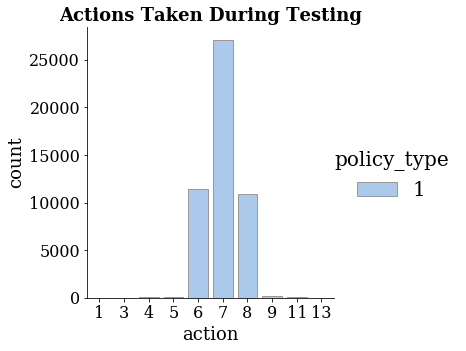

In [7]:
#plot actions taken as a histogram

import seaborn as sns
#fig,ax = plt.subplots(figsize=14,12))
#sns.lineplot(x = "step", y = "action", data = frame, hue = "action")
#sns.boxplot(frame['action'])
#sns.distplot(frame['action'],hue=frame['policy_type'])
sns.catplot(x="action", hue="policy_type", kind="count",
            palette="pastel", edgecolor=".6",
            data=frame)
plt.title("Actions Taken During Testing")
#plt.plot(frame['action'],label='Action Taken')
#ax.set_ylabel('Fraction')
#ax.set_xlabel('Action')
#plt.legend(fontsize='x-large')
#plt.show()


frame.groupby('action').count()

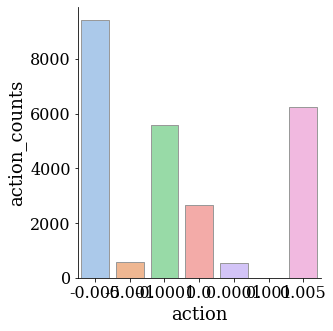

In [58]:
#np.random.randint(low = 1200, high = 2000)
#between 1200 and 2000
#data['B:VIMIN_DIFF'] = data['B:VIMIN'] - data['B:VIMIN'].shift(-1)
#[0, 0.0001, 0.005, 0.001, -0.0001, -0.005, -0.001]

#if you want to put the histogram in order by actions (it is in order for the 15 action space, but not for 7)
new = pd.DataFrame()
action_order = pd.Series([-0.001, -0.005, -0.0001, 0, 0.0001, 0.005, 0.001])
action_counts = pd.Series([584, 9419, 5565, 2662, 550, 6220, 0])

new['action'] = action_order
new['action_counts'] = action_counts
new

sns.catplot(x="action", y='action_counts', palette="pastel", kind="bar", edgecolor=".6", data=new)

In [43]:
#compare historical data to the actions recommended by the RL agent

import os
import sys
from gym import spaces

cwd = os.getcwd()
new = 'C:/Users/dkafkes/Desktop/fermi/accelerator-reinforcement-learning/control-for-accelerators-in-hep/dataprep'

sys.path.append(new)
os.chdir(sys.path[-1])
import dataset as dp
os.chdir(cwd)

data = dp.load_reformated_cvs('../data/data_release.csv', nrows=250000)

In [44]:
# this part isn't necessary for the plotting 
# Dynamically allocate action space like how it is in the RL code

# data['B:VIMIN_DIFF'] = data['B:VIMIN'] - data['B:VIMIN'].shift(-1)
# nactions = 15 #cd.run_params['nactions']
# action_space = spaces.Discrete(nactions)
# actionMap_VIMIN = []
# for i in range(1, nactions + 1):
#     actionMap_VIMIN.append(data['B:VIMIN_DIFF'].quantile(i / (nactions + 1)))

#data['B:IMINER'].min()

#from the original 7 sized action space of [0, 0.0001, 0.005, 0.001, -0.0001, -0.005, -0.001]
frame['action map'] = 0
frame['action map'][frame['action'] == 0] = 0
frame['action map'][frame['action'] == 1] = 0.0001
frame['action map'][frame['action'] == 2] = 0.005
frame['action map'][frame['action'] == 3] = 0.001
frame['action map'][frame['action'] == 4] = -0.0001
frame['action map'][frame['action'] == 5] = -0.005
frame['action map'][frame['action'] == 6] = -0.001

#from the dynamic allocation to 15 actions
#[-0.019126890000009666,-0.0136260999999962,-0.010200499999996282,-0.007598880000003305,-0.005424499999989507,
# -0.0034713800000076844,-0.001670838749991077,0.0,0.001686089999992646,0.0035095200000085924,0.005432130000002644,
# 0.007606499999994298, 0.01018523999999843,0.013475425000002872,0.01878356999999653]

# frame['action map'] = 0
# frame['action map'][frame['action'] == 0] = -0.019126890000009666
# frame['action map'][frame['action'] == 1] = -0.0136260999999962
# frame['action map'][frame['action'] == 2] = -0.010200499999996282
# frame['action map'][frame['action'] == 3] = -0.007598880000003305
# frame['action map'][frame['action'] == 4] = -0.005424499999989507
# frame['action map'][frame['action'] == 5] = -0.0034713800000076844
# frame['action map'][frame['action'] == 6] = -0.001670838749991077
# frame['action map'][frame['action'] == 7] = 0.0
# frame['action map'][frame['action'] == 8] = 0.001686089999992646
# frame['action map'][frame['action'] == 9] = 0.0035095200000085924
# frame['action map'][frame['action'] == 10] = 0.005432130000002644
# frame['action map'][frame['action'] == 11] = 0.007606499999994298
# frame['action map'][frame['action'] == 12] = 0.01018523999999843
# frame['action map'][frame['action'] == 13] = 0.013475425000002872
# frame['action map'][frame['action'] == 14] = 0.01878356999999653

frame.head()

C:\Users\dkafkes\Anaconda3\envs\AIgym\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\dkafkes\Anaconda3\envs\AIgym\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,current_state,action,reward,PID_reward,data_reward,next_state,total_reward,done,policy_type,episode,action map
0,[-0.17213808 0.12567613 -0.70582956 0.161322...,6,-0.130391,-0.050985,-0.014687,[-0.17213808 0.12567613 -0.70582956 0.161322...,-0.130391,False,1,0,-0.001
1,[ 0.08262368 -0.07388389 -0.70582956 0.161057...,9,-0.077152,-0.122833,-0.115313,[ 0.08262368 -0.07388389 -0.70582956 0.161057...,-0.207542,False,1,0,0.000
2,[-0.03867906 -0.05439883 -0.70582956 0.160793...,6,-0.056887,-0.012672,-0.055312,[-0.03867906 -0.05439883 -0.70582956 0.160793...,-0.264430,False,1,0,-0.001
3,[-0.1599818 0.0763883 -0.70582956 0.161785...,6,-0.079131,-0.092153,-0.090313,[-0.1599818 0.0763883 -0.70582956 0.161785...,-0.343561,False,1,0,-0.001
4,[-0.03757394 0.00577661 -0.70582956 0.161388...,8,-0.005695,-0.071043,-0.034688,[-0.03757394 0.00577661 -0.70582956 0.161388...,-0.349256,False,1,0,0.000


49000


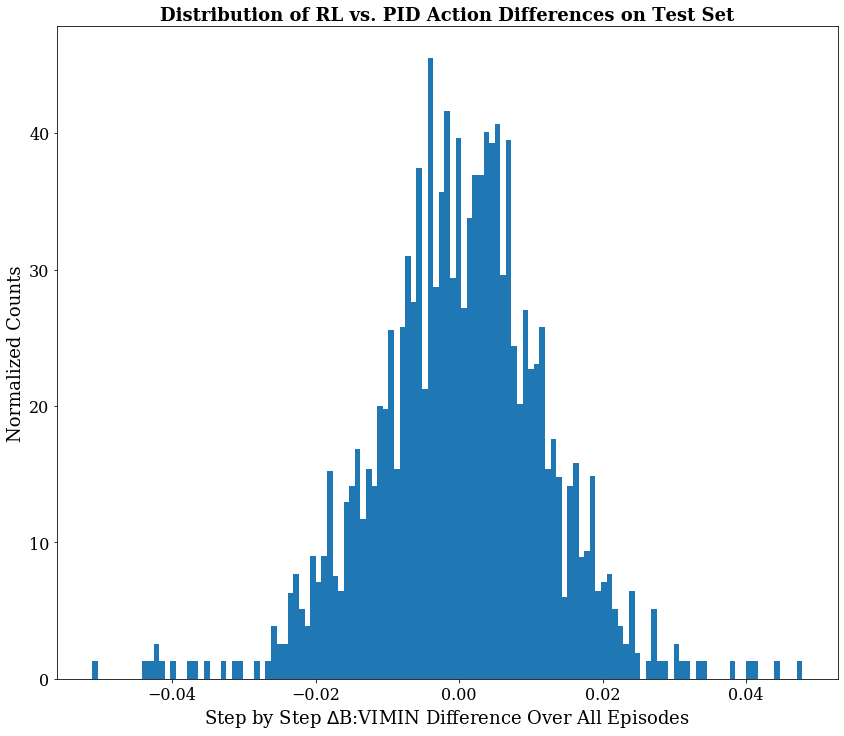

In [45]:
episodic_pid_diff = []

for ep in range(0, 1000):
    pid_diff = data[variables][150+ep:150+ep+50]['B:VIMIN'].diff()
    episodic_pid_diff.append(np.asarray(pid_diff.reset_index()['B:VIMIN']))
    
#episodic_pid_diff


episodic_dqn_diff = []

for ep in range(0, 1000):
    dqn_diff = frame['action map'][0+ep:0+ep+50]
    episodic_dqn_diff.append(np.asarray(dqn_diff))

step_by_step_diff = np.subtract(episodic_pid_diff, episodic_dqn_diff)

all_diff = step_by_step_diff.flatten()
all_diff = all_diff[~np.isnan(all_diff)]

print(len(all_diff))

checking = pd.DataFrame()
coverage = np.asarray(episodic_pid_diff).flatten()
checking['spread'] = pd.Series(coverage)
checking[(checking.spread >= -.001) & (checking.spread <= .001)]

plt.figure(figsize=(14,12))
plt.title("Distribution of RL vs. PID Action Differences on Test Set")
plt.hist(all_diff, bins='auto', density = True)
plt.ylabel('Normalized Counts')
plt.xlabel('Step by Step $\Delta$B:VIMIN Difference Over All Episodes')
plt.savefig('Step by Step Difference.pdf')

In [132]:
print("Mean: ", all_diff.mean())
print("Standard Deviation: ", all_diff.std())

new = pd.DataFrame()
new['diff'] = pd.Series(all_diff)
new.describe()

Mean:  0.0005673815181632659
Standard Deviation:  0.01285263281373691


,diff
count,49000.000000
mean,0.000567
std,0.012853
min,-0.048732
25%,-0.007229
50%,0.000773
75%,0.008746
max,0.052813


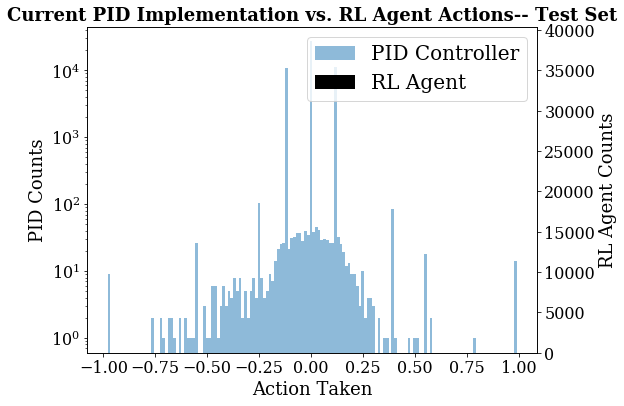

In [52]:
#plot the PID and RL actions over each other
a = np.asarray(frame['current_state']) #1000 episodes, 50 steps

bvimin_list = []

for state in a:
    bvimin_list.append(float(state[1:-1].split()[0]))
    
frame['B:VIMIN'] = pd.Series(bvimin_list) 

frame.head()

pid_bvimin_list = np.asarray(data['B:VIMIN'] - data['B:VIMIN'].shift(-1))

frame['PID Action'] = frame['B:VIMIN'] - frame['B:VIMIN'].shift(-1)
frame.head()
frame.groupby('PID Action').count()
#plt.hist(frame['PID Action'], bins='auto', density = True)

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# To make things reproducible...
np.random.seed(1977)

fig, ax = plt.subplots(figsize = (10, 6))

# Twin the x-axis twice to make independent y-axes.
axes = [ax, ax.twinx()]

# Make some space on the right side for the extra y-axis.
fig.subplots_adjust(right=0.75)

# Move the last y-axis spine over to the right by 20% of the width of the axes
# axes[-1].spines['right'].set_position(('axes', 1.2))

# To make the border of the right-most axis visible, we need to turn the frame
# on. This hides the other plots, however, so we need to turn its fill off.
# axes[-1].set_frame_on(True)
# axes[-1].patch.set_visible(False)

# And finally we get to plot things...
# colors = ('Green', 'Red', 'Blue')
# for ax, color in zip(axes, colors):
#     data = np.random.random(1) * np.random.random(10)
#     ax.plot(data, marker='o', linestyle='none', color=color)
#     ax.set_ylabel('%s Thing' % color, color=color)
#     ax.tick_params(axis='y', colors=color)

# for ax, hist in zip(axes, [vector, frame['action map']]):
vector = frame['B:VIMIN'] - frame['B:VIMIN'].shift(-1)

lns1 = axes[0].hist(np.asarray(vector), bins=150, alpha =.5, label = 'PID Controller')
axes[0].set_ylabel('PID Counts')
axes[0].set_yscale('log')
# axes[0].tick_params(axis='y')
# axes[0].set_xlim(min(actionMap_VIMIN), max(actionMap_VIMIN))

lns2 = axes[1].hist(np.asarray(frame['action map']), bins=7, color = 'k', label = 'RL Agent')
#axes[1].hist(np.asarray(actionMap_VIMIN), bins=25, color = 'k', label = 'RL Agent', alpha = .5)
axes[1].set_ylabel('RL Agent Counts')
# axes[1].tick_params(axis='y')

# start, end = axes[1].get_ylim()
# axes[1].yaxis.set_ticks(np.arange(start, end*10))
#axes[1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
#axes[1].set_yscale('log')

    
axes[0].set_xlabel('Action Taken')


plt.title("Current PID Implementation vs. RL Agent Actions-- Test Set")

# axes[0].legend()
# axes[1].legend()
# print(lns1)
# lns = lns1+lns2
# labs = [lns1[2][0].get_label(), lns2[2][0].get_label()]
# plt.legend([lns1, lns2], ['PID', 'RL Agent'])

lines, labels = axes[0].get_legend_handles_labels()
lines2, labels2 = axes[1].get_legend_handles_labels()
axes[1].legend(lines + lines2, labels + labels2, loc=0)

# plt.savefig('RL vs. PID.pdf')
plt.show()

#action from the 
#make B:IMINER one too

#test on a longer set

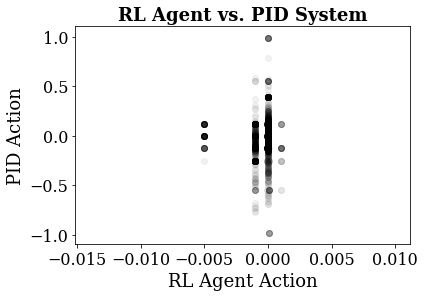

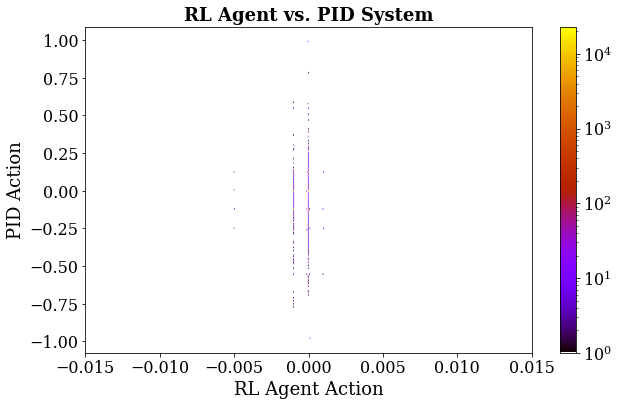

In [55]:
#these plots was deemed not good enough
# try a scatter plot?

vector = frame['B:VIMIN'] - frame['B:VIMIN'].shift(-1)
plt.scatter(frame['action map'], vector, color = 'k', alpha = .05)
plt.title('RL Agent vs. PID System')
plt.xlabel('RL Agent Action')
plt.ylabel('PID Action')
# plt.xlim(-.15, .15)
# plt.ylim(-0.01, 0.01)

import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np

x = np.array(frame["action map"])
y = np.array(vector)

fig, ax = plt.subplots(figsize = (10, 6))

cmap = plt.cm.gnuplot
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist[0] = (1.0,1.0,1.0,1.0)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('mcm',cmaplist, cmap.N)

plot = ax.hexbin(x,y, gridsize=(100,100), cmap=cmap, linewidth=0, norm = matplotlib.colors.LogNorm())
ax.set_xlim(-.015, .015)
fig.colorbar(plot)
plt.title('RL Agent vs. PID System')
plt.xlabel('RL Agent Action')
plt.ylabel('PID Action')

plt.show()

Best total reward roll:  -0.00010480642959


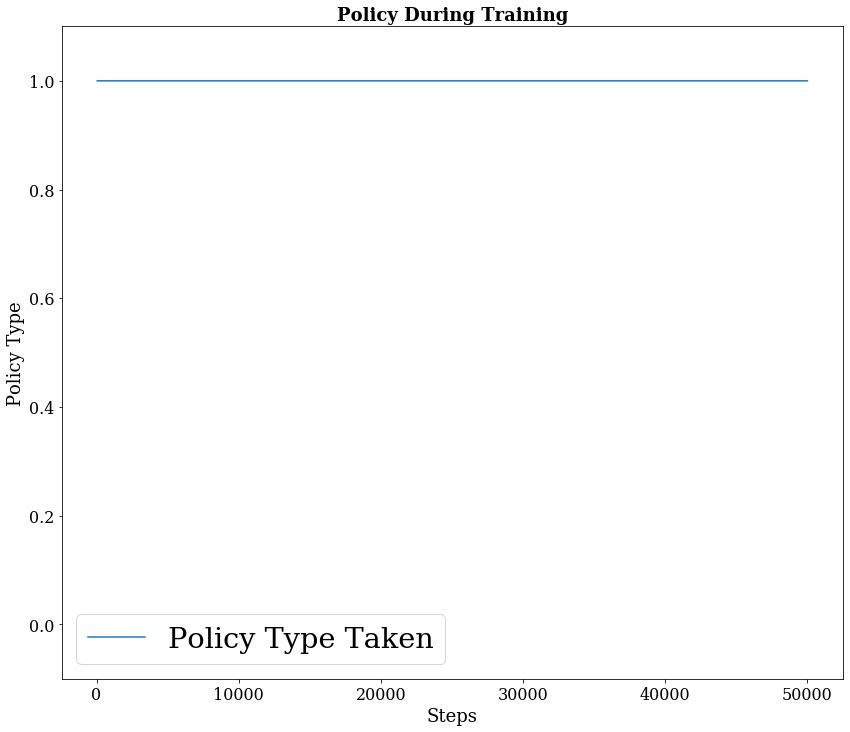

In [70]:
# exploration-exploitation curve (should be 1 for test!)

# print(len(frame['total_reward']))
# frame = frame[frame.done==True] 
# frame = frame.reset_index()
# max_total_reward = frame['total_reward'].max()
# print('Best total reward: ', max_total_reward)
# print('Best total reward ratio1: ', max_total_reward/step100_mean)
# print('Best total reward ratio2: ', step100_mean/max_total_reward)
# ## rolling averages ##
rolling_setting = 50 #before

frame['policy_type_roll'] = frame['policy_type'] #.rolling(rolling_setting).mean()
frame['total_reward_roll'] = frame['total_reward'] #.rolling(rolling_setting).mean()
frame['total_reward_std'] = frame['total_reward'] #.rolling(rolling_setting).std()
frame = frame.dropna()
frame = frame.reset_index()
max_total_reward_roll = frame['total_reward_roll'].max()
print('Best total reward roll: ', max_total_reward_roll)
# print('Best total reward roll ratio1: ', max_total_reward_roll/step100_mean)
# print('Best total reward roll ratio2: ', step100_mean/max_total_reward_roll)

## Plot all action types ##
fig,ax = plt.subplots(1, 1,figsize=(14,12))
plt.plot(frame['policy_type_roll'].rolling(rolling_setting).mean().interpolate(method='cubic'),label='Policy Type Taken')
ax.set_xlabel('Steps')
ax.set_ylabel('Policy Type')
plt.ylim(-0.1,1.1)
plt.legend(fontsize='x-large')
plt.title("Policy During Training")
plt.show()

Best total reward roll:  -0.00010480642959


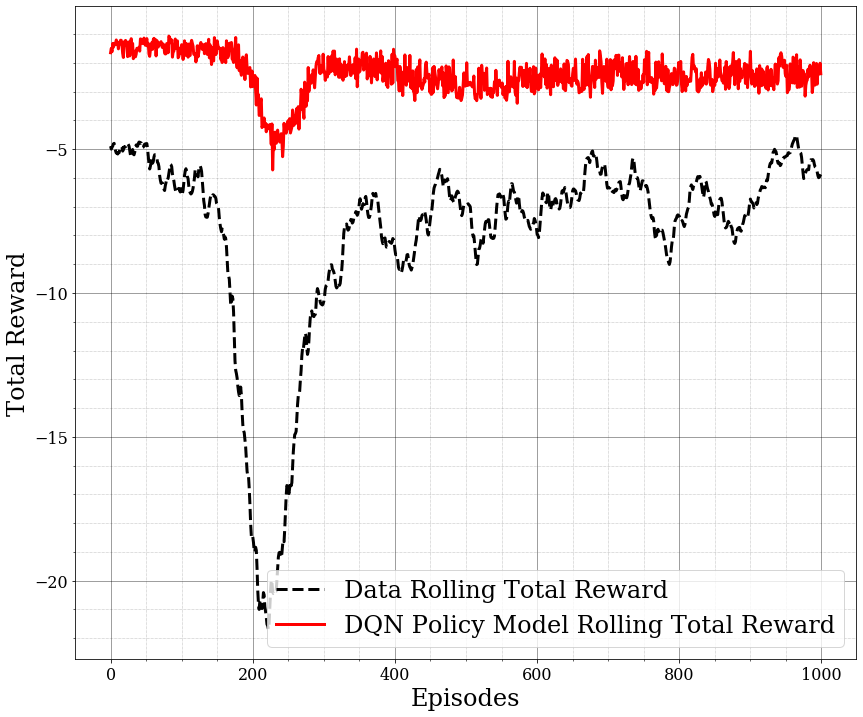

In [65]:
# PLOT the reward curves

## Print total reward ##
#frame_done = frame[frame.done==True] 
#frame_done = frame_done.reset_index()
#print(frame_done.total_reward_roll)
#frame_done.total_reward.plot()
#ax.fill_between(frame['episode'], step100_mean-2*step100_std, step100_mean+2*step100_std, label='2 sigma range', color='green', alpha=0.75)
#ax.fill_between(frame['episode'], step100_mean-step100_std, step100_mean+step100_std,label='1 sigma range', color='yellow', alpha=0.75)
#plt.plot(frame['total_reward'],label='Single DQN-MLP reward')
# print(frame['total_reward_roll']-frame['total_reward_std)
# shape = ax.fill(np.NaN, np.NaN, 'r', alpha=0.1)

#label='1 sigma range', color='red', alpha=0.15)
#ax.set_xlabel('Steps')
#ax.set_ylabel('Policy Type')
#plt.xlim(0,1750)
#plt.ylim(-16,0)
#plt.legend([data_line, (line, shape)], ["Current controler reward", "DQN-MLP controler reward"])
#plt.legend(fontsize='x-large')
#fig,ax = plt.subplots(1, 1,figsize=(14,12))
#plt.plot(frame.total_reward_roll, label='Total Reward')

fig, ax = plt.subplots(1, 1,figsize=(14,12))

#for test
data_line, = plt.plot(rewards.data_reward, lw=3, ls='--', color='black', label='Data reward')
agent_line, = plt.plot(rewards.agent_reward,lw=3, color='red', label = 'DQN reward') 

#for train
# rolled = 10
# data_line, = plt.plot(rewards.data_reward.rolling(rolled).mean(), lw=3, ls='--', color='black', label='Data reward')
# agent_line, = plt.plot(rewards.agent_reward.rolling(rolled).mean(),lw=3, color='red', label = 'DQN reward') 


# data_line, = plt.plot(rewards.data_reward, lw=3, ls='--', color='black', label='Data reward')
# agent_line, = plt.plot(rewards.agent_reward,lw=3, color='red', label = 'DQN reward') 

# PID_line, = plt.plot(rewards.PID_reward.rolling(rolled).mean(), lw=2, color='b', label = 'PID reward with DQN action')
x = np.linspace(0, rewards.shape[0], rewards.shape[0])
# ax.fill_between(x, rewards.agent_reward.rolling(25).mean() - rewards.agent_reward.rolling(25).std(),
#                 rewards.agent_reward.rolling(25).mean() + rewards.agent_reward.rolling(25).std(),
#                  color='red', alpha=0.1)

# plt.legend([data_line, agent_line, PID_line], ['Data Rolling Total Reward','DQN Rolling Total Reward', 'PID Rolling Total Reward With DQN Action'],
#            loc='lower right', fontsize='large')

plt.legend([data_line, agent_line], ['Data Rolling Total Reward','DQN Policy Model Rolling Total Reward'],
           loc='lower right', fontsize='large')


#for train
# fig, ax = plt.subplots(1, 1,figsize=(14,12))
# agent_line, = plt.plot(frame.total_reward_roll, lw=3, color='r', label = 'DQN reward')
# x = np.linspace(0, frame.shape[0], frame.shape[0])
# data_line, = plt.plot(x, [step100_mean]*len(x), color = 'k', lw=3, ls='--', label = 'Data reward')
# ax.fill_between(x, frame.total_reward_roll - frame.total_reward_std, frame.total_reward_roll + frame.total_reward_std, color='red', alpha=0.1)

# plt.legend([agent_line, data_line], ['DQN reward', 'Data reward'], loc='upper left', fontsize='large')

ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', alpha=0.75,color='black')
ax.grid(which='minor', linestyle=':', linewidth='0.5', alpha=0.5,color='black')
ax.set_xlabel('Episodes', fontsize='large')
ax.set_ylabel('Total Reward', fontsize='large')
# plt.ylim(-18, -2)
# plt.xlim(0, 400)
#plt.ylim(-12, 0)
#plt.title('Training Rolling Total Reward ({} Episodes)'.format(rolled))
#plt.title('Testing Total Reward')
# plt.savefig('large font test.pdf')
plt.show()

#max_idx = frame['total_reward'].argmax()